<a href="https://colab.research.google.com/github/asd3656/AI_12_cp2/blob/main/Action_items.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 준비

In [1]:
from google.colab import drive
drive.mount("/content/MyDrive/")

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
df = pd.read_csv('/content/MyDrive/MyDrive/CP2_project/2019-Oct.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [4]:
df2 = pd.read_csv('/content/MyDrive/MyDrive/CP2_project/model_df.csv')
df2.head()

,Unnamed: 0,user_id,category_code,product_id,Class
0,0,543272936,electronics.smartphone,1004856,1
1,1,551377651,electronics.smartphone,1002532,2
2,2,514591159,NaN,5100816,3
3,3,555332717,furniture.bathroom.toilet,13800054,2
4,4,524601178,electronics.audio.headphone,4804055,3


In [5]:
df2.drop(['Unnamed: 0'], axis = 1, inplace = True) # Unnamed 삭제
df2

,user_id,category_code,product_id,Class
0,543272936,electronics.smartphone,1004856,1
1,551377651,electronics.smartphone,1002532,2
2,514591159,NaN,5100816,3
3,555332717,furniture.bathroom.toilet,13800054,2
4,524601178,electronics.audio.headphone,4804055,3
...,...,...,...,...
742844,516604399,NaN,26402784,1
742845,514622109,construction.tools.light,47500017,2
742846,512717356,electronics.smartphone,1003306,1
742847,533892594,electronics.smartphone,1004240,1


In [6]:
class1_df = df2[df2['Class'] == 1]
class2_df = df2[df2['Class'] == 2]
class3_df = df2[df2['Class'] == 3]

In [14]:
class1 = list(class1_df['user_id'].unique())
VIP = df[df['user_id'].isin(class1)]
VIP = VIP[VIP['event_type'] == 'purchase']
VIP

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
1649,2019-10-01 02:19:34 UTC,purchase,1005104,2053013555631882655,electronics.smartphone,apple,975.57,555160488,a1395546-c124-456c-9752-0f5cf883c63d
1838,2019-10-01 02:20:16 UTC,purchase,4700419,2053013560899928785,auto.accessories.videoregister,sho-me,141.86,512550575,84f21dc3-df18-4cf3-accd-bcd9655891ca
2927,2019-10-01 02:23:25 UTC,purchase,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,515384420,7f82b450-6c45-4346-96fb-ecf4ab25779c
5210,2019-10-01 02:28:40 UTC,purchase,1005104,2053013555631882655,electronics.smartphone,apple,975.57,552408931,e8b95f1a-5f87-40ab-b75a-40942d5a1726
...,...,...,...,...,...,...,...,...,...
42447890,2019-10-31 23:53:18 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
42447959,2019-10-31 23:53:53 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251
42448148,2019-10-31 23:55:13 UTC,purchase,26402784,2053013563651392361,NaN,NaN,102.45,516604399,a98bd433-57ac-42d0-ba81-e18b135a7a16
42448271,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b


In [18]:
class2 = list(class2_df['user_id'].unique())
VIP_2 = df[df['user_id'].isin(class2)]
VIP_2 = VIP_2[VIP_2['event_type'] == 'purchase']
VIP_2

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
442,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
603,2019-10-01 00:09:54 UTC,purchase,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
749,2019-10-01 00:12:14 UTC,purchase,4802036,2053013554658804075,electronics.audio.headphone,apple,171.56,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683
1558,2019-10-01 02:19:10 UTC,purchase,1004246,2053013555631882655,electronics.smartphone,apple,736.18,515246296,b7dbae4f-cad3-463e-89ce-41990cf48dea
...,...,...,...,...,...,...,...,...,...
42447440,2019-10-31 23:49:30 UTC,purchase,1003316,2053013555631882655,electronics.smartphone,apple,928.38,544501248,8ae7872b-55c5-4e61-ab65-803091bacd7c
42447449,2019-10-31 23:49:32 UTC,purchase,1002524,2053013555631882655,electronics.smartphone,apple,531.26,516662286,d1b46fb7-cf95-4b40-9460-f7abde16c4d3
42448049,2019-10-31 23:54:33 UTC,purchase,26205284,2053013563693335403,NaN,NaN,143.89,513040838,639dc99e-72cd-433d-ad90-24c78d71418f
42448173,2019-10-31 23:55:21 UTC,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c


In [19]:
class3 = list(class3_df['user_id'].unique())
VIP_3 = df[df['user_id'].isin(class3)]
VIP_3 = VIP_3[VIP_3['event_type'] == 'purchase']
VIP_3

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
379,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
574,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
618,2019-10-01 00:10:08 UTC,purchase,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
672,2019-10-01 00:10:56 UTC,purchase,6200687,2053013552293216471,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0
860,2019-10-01 00:14:14 UTC,purchase,1004932,2053013555631882655,electronics.smartphone,vivo,463.31,555083442,83d12d1a-5452-4fa0-abbb-d9f492f8b562
...,...,...,...,...,...,...,...,...,...
19496131,2019-10-15 09:46:34 UTC,purchase,4803895,2053013554658804075,electronics.audio.headphone,jbl,48.14,532550201,e4d8a7ca-f7b7-413f-9c60-546ccf8961fd
19496314,2019-10-15 09:46:41 UTC,purchase,3601603,2053013563810775923,appliances.kitchen.washer,lg,384.56,547878494,62ebfe6f-2892-4b62-98ad-bdbca1b88061
21623485,2019-10-16 16:17:44 UTC,purchase,26400785,2053013563651392361,NaN,lucente,417.26,513337572,7bee69c0-4f8a-4062-be8c-e98053750c72
25586750,2019-10-19 11:59:32 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,249.86,547420007,5a0f9896-4b2e-483d-865f-593b353b9bfa


##1. Action item

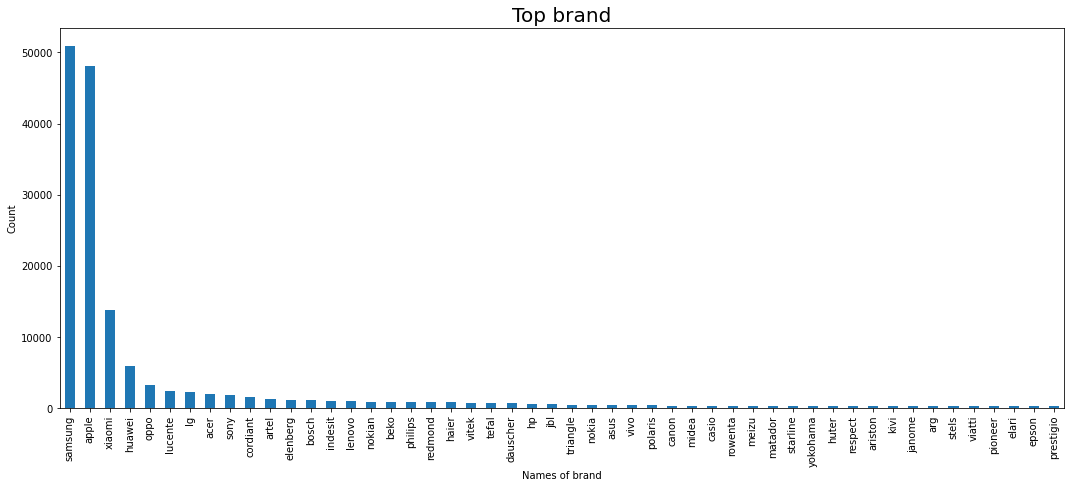

In [17]:
#1등급 고객들의 브랜드별 판매순위
VIP['brand'].value_counts().head(50).plot.bar(figsize = (18,7))
plt.title('Top brand',fontsize = 20)
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

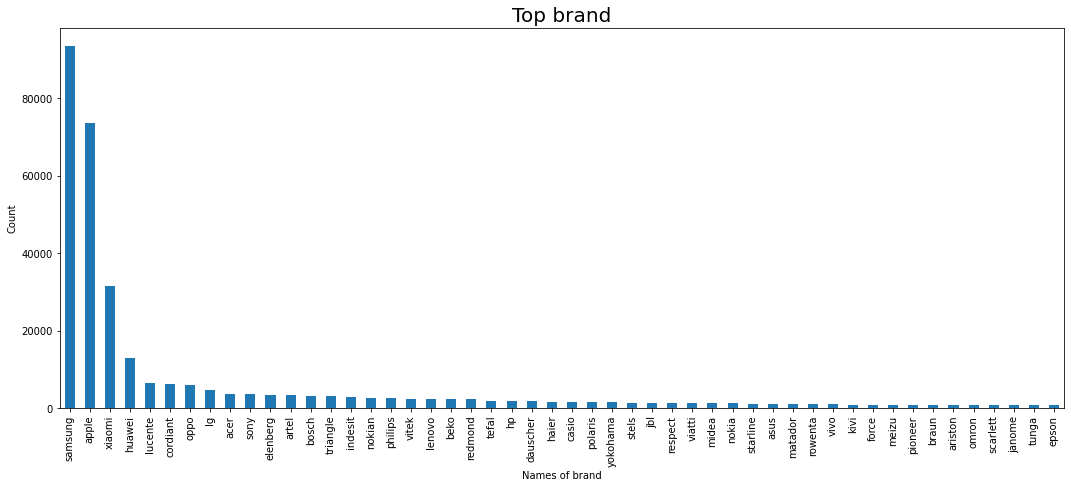

In [20]:
#2등급 고객들의 브랜드별 판매순위
VIP_2['brand'].value_counts().head(50).plot.bar(figsize = (18,7))
plt.title('Top brand',fontsize = 20)
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

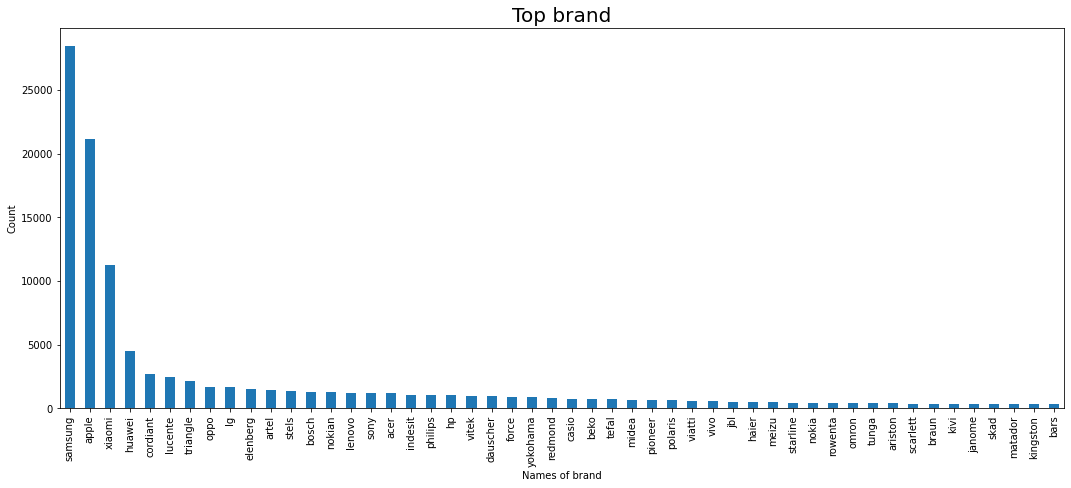

In [21]:
#3등급 고객들의 브랜드별 판매순위
VIP_3['brand'].value_counts().head(50).plot.bar(figsize = (18,7))
plt.title('Top brand',fontsize = 20)
plt.xlabel('Names of brand')
plt.ylabel('Count')
plt.show()

=> 1,2,3등급 고객들의 브랜드별 판매순위를 봤을 때 큰 차이는 없으며 상위3개 브랜드는 samsung, apple, xiaomi로 같다. 따라서 모든 등급에서 판매순위가 높은 브랜드 3곳의 제품 할인행사를 진행한다면 이는 기업의 매출 증대로 이어질 수 있을 것이다.






## 2. Action item

In [22]:
top_category_code = VIP.loc[:,'category_code'].value_counts()[:30].sort_values(ascending=False)

In [37]:
class1 = list(class1_df['user_id'].unique())
VIP_view = df[df['user_id'].isin(class1)]
view_VIP = VIP_view[VIP_view['event_type'] == 'view']
view_VIP

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
26,2019-10-01 00:00:24 UTC,view,34700031,2061717937420501730,NaN,NaN,151.87,539512263,f27a45f8-fb98-459a-96a6-45271f56a987
44,2019-10-01 00:00:35 UTC,view,4300070,2053013552385491165,NaN,timberk,38.59,544648245,bb8e28c8-d11f-428a-95e7-056e974fe835
94,2019-10-01 00:01:24 UTC,view,34700023,2061717937420501730,NaN,NaN,109.40,539512263,f27a45f8-fb98-459a-96a6-45271f56a987
99,2019-10-01 00:01:28 UTC,view,4300070,2053013552385491165,NaN,timberk,38.59,544648245,bb8e28c8-d11f-428a-95e7-056e974fe835
129,2019-10-01 00:01:46 UTC,view,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
...,...,...,...,...,...,...,...,...,...
42448644,2019-10-31 23:59:10 UTC,view,16900105,2053013558433677895,furniture.kitchen.table,brw,135.40,548719875,68bc6a85-ba5a-4688-a95f-bc506bcd1d40
42448669,2019-10-31 23:59:20 UTC,view,5801525,2053013553945772349,electronics.audio.subwoofer,alphard,69.37,551943550,9c5bc5aa-1b0a-48f9-963c-e04aa3163bbc
42448735,2019-10-31 23:59:51 UTC,view,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a
42448741,2019-10-31 23:59:53 UTC,view,17200505,2053013559792632471,furniture.living_room.sofa,NaN,543.10,557880508,4a9bfeae-21f3-40d9-a8db-bb7720c521a5


In [61]:
class2 = list(class2_df['user_id'].unique())
VIP2_view = df[df['user_id'].isin(class2)]
view_VIP2 = VIP2_view[VIP2_view['event_type'] == 'view']
view_VIP2

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
28,2019-10-01 00:00:25 UTC,view,27500014,2053013554692358509,NaN,redmond,37.98,555217733,74d40a28-41f9-4325-bbae-b179bd2c0a38
29,2019-10-01 00:00:25 UTC,view,19001139,2053013557225718275,NaN,gran-stone,67.58,525734504,83f584ed-c7f7-442e-8ae9-713cb27fdece
47,2019-10-01 00:00:36 UTC,view,3600575,2053013563810775923,appliances.kitchen.washer,hotpoint-ariston,275.37,554754045,bd0302ef-c5ca-4b6a-b916-95cc2840c72c
51,2019-10-01 00:00:41 UTC,view,1003141,2053013555631882655,electronics.smartphone,apple,382.97,551377651,ca11a570-47da-4630-898b-9a03127703da
61,2019-10-01 00:00:50 UTC,view,19000296,2053013557225718275,NaN,gran-stone,64.93,525734504,83f584ed-c7f7-442e-8ae9-713cb27fdece
...,...,...,...,...,...,...,...,...,...
42448702,2019-10-31 23:59:33 UTC,view,2200885,2053013560555995845,NaN,nikon,220.17,517811633,97dc1638-90ea-450a-8499-a31fd8f2e9b1
42448706,2019-10-31 23:59:35 UTC,view,1002524,2053013555631882655,electronics.smartphone,apple,531.26,565404816,d9cf0ac4-c3ec-4e1f-83aa-326b1e7b1581
42448722,2019-10-31 23:59:44 UTC,view,4804056,2053013554658804075,electronics.audio.headphone,apple,160.57,544501248,e330d051-37ad-4dc3-b1ee-ff16a28b7998
42448734,2019-10-31 23:59:50 UTC,view,13104838,2053013553526341921,NaN,remain,207.98,525530673,58da4d41-bb51-4bc1-99e1-9ae571957fd6


In [62]:
class3 = list(class3_df['user_id'].unique())
VIP3_view = df[df['user_id'].isin(class3)]
view_VIP3 = VIP3_view[VIP3_view['event_type'] == 'view']
view_VIP3

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
13,2019-10-01 00:00:15 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
22,2019-10-01 00:00:22 UTC,view,1480714,2053013561092866779,computers.desktop,pulser,921.49,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
23,2019-10-01 00:00:23 UTC,view,1004739,2053013555631882655,electronics.smartphone,xiaomi,197.55,519530528,9882d21f-2c5f-496b-90d4-a1503edb6562
...,...,...,...,...,...,...,...,...,...
42448431,2019-10-31 23:57:27 UTC,view,1480163,2053013561092866779,computers.desktop,acer,617.75,513741043,82f7f972-346a-41f1-ae58-3ccf1edf6726
42448492,2019-10-31 23:57:54 UTC,view,15700147,2053013559733912211,NaN,NaN,344.90,518001730,2a0ecdca-256f-4917-bfae-c7cbcea513a3
42448579,2019-10-31 23:58:41 UTC,view,12202878,2116907525176557699,sport.bicycle,haro,205.67,513741043,82f7f972-346a-41f1-ae58-3ccf1edf6726
42448688,2019-10-31 23:59:27 UTC,view,1307350,2053013558920217191,computers.notebook,acer,514.79,513741043,82f7f972-346a-41f1-ae58-3ccf1edf6726


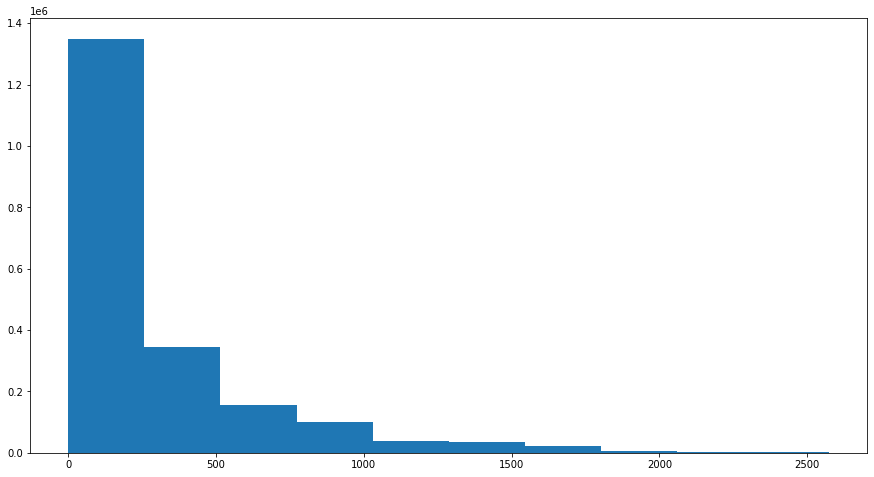

In [44]:
#1등급 고객들이 본 제품 가격
plt.figure(figsize=(15,8))
plt.hist(view_VIP['price'])
plt.show()

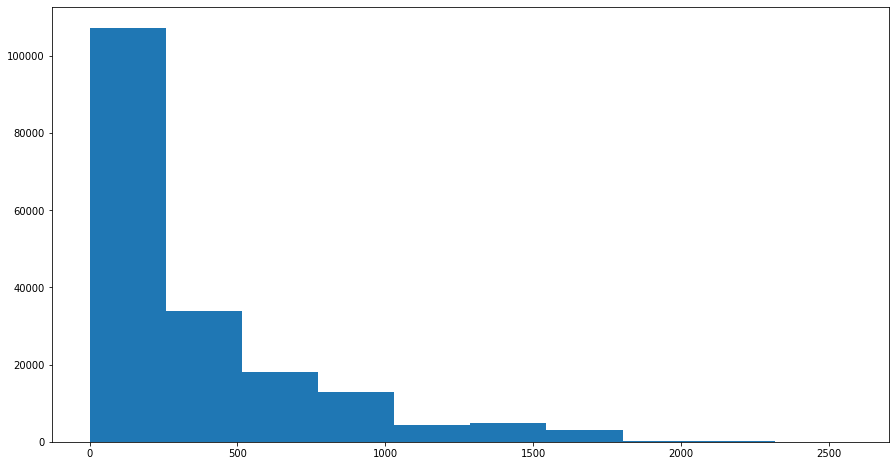

In [48]:
#1등급 고객들이 산 제품 가격
plt.figure(figsize=(15,8))
plt.hist(VIP['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(array([397862., 299018., 263973., 209985., 183010.,  96752.,  77317.,
         67844.,  65515.,  35991.]),
 array([  0.   ,  52.315, 104.63 , 156.945, 209.26 , 261.575, 313.89 ,
        366.205, 418.52 , 470.835, 523.15 ]),
 <a list of 10 Patch objects>)

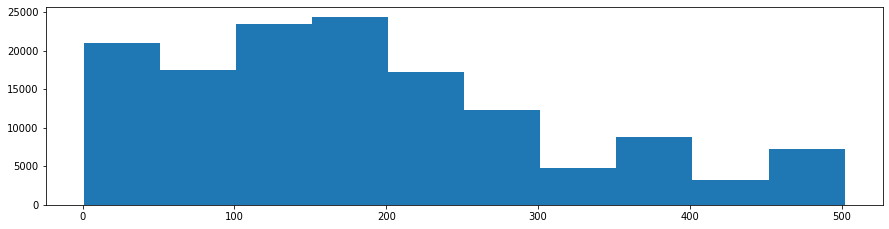

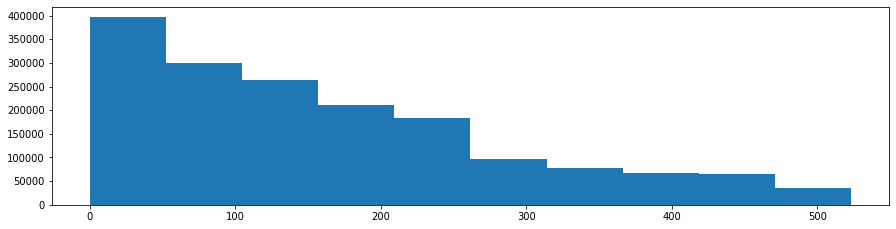

In [75]:
#1등급 고객들이 산 제품 가격(이상치 제거)
q1 = VIP['price'].quantile(0.25)
q3 = VIP['price'].quantile(0.75)
iqr = q3-q1

condition = VIP['price']>q3+1.5*iqr
a = VIP[condition].index
VIP.drop(a,inplace=True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.hist(VIP['price'])

#1등급 고객들이 본 제품 가격(이상치 제거)
q1 = view_VIP['price'].quantile(0.25)
q3 = view_VIP['price'].quantile(0.75)
iqr = q3-q1

condition = view_VIP['price']>q3+1.5*iqr
a = view_VIP[condition].index
view_VIP.drop(a,inplace=True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.hist(view_VIP['price'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(array([1740280., 1268441.,  993664.,  701492.,  606913.,  347294.,
         305003.,  203486.,  203391.,  118585.]),
 array([  0.   ,  54.629, 109.258, 163.887, 218.516, 273.145, 327.774,
        382.403, 437.032, 491.661, 546.29 ]),
 <a list of 10 Patch objects>)

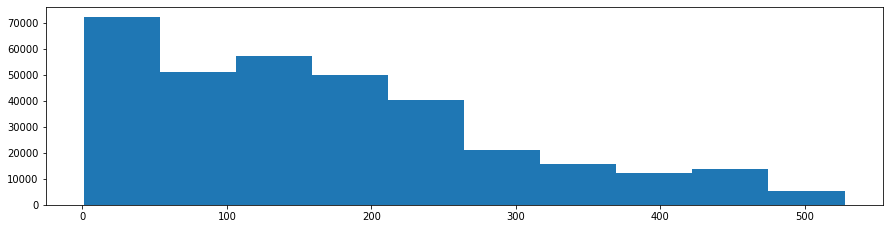

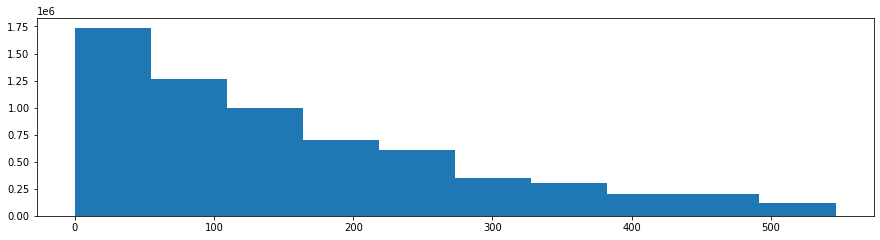

In [76]:
#2등급 고객들이 산 제품 가격(이상치 제거)
q1 = VIP_2['price'].quantile(0.25)
q3 = VIP_2['price'].quantile(0.75)
iqr = q3-q1

condition = VIP_2['price']>q3+1.5*iqr
a = VIP_2[condition].index
VIP_2.drop(a,inplace=True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.hist(VIP_2['price'])

#2등급 고객들이 본 제품 가격(이상치 제거)
q1 = view_VIP2['price'].quantile(0.25)
q3 = view_VIP2['price'].quantile(0.75)
iqr = q3-q1

condition = view_VIP2['price']>q3+1.5*iqr
a = view_VIP2[condition].index
view_VIP2.drop(a,inplace=True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.hist(view_VIP2['price'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(array([722189., 602496., 398999., 339659., 204462., 185143., 110092.,
        110399.,  63626.,  68657.]),
 array([  0.   ,  50.216, 100.432, 150.648, 200.864, 251.08 , 301.296,
        351.512, 401.728, 451.944, 502.16 ]),
 <a list of 10 Patch objects>)

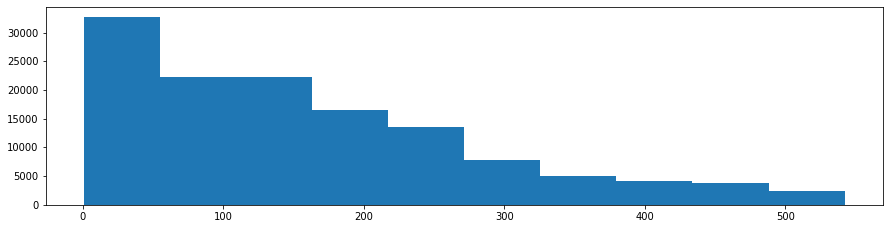

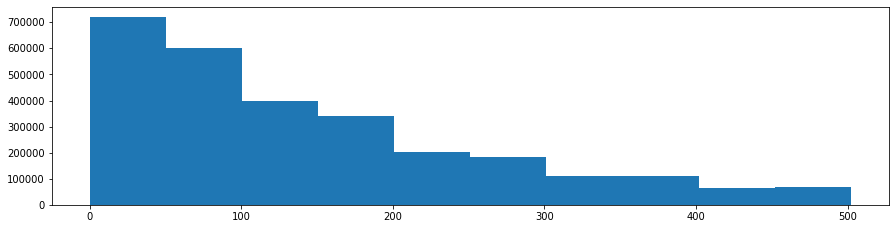

In [77]:
#3등급 고객들이 산 제품 가격(이상치 제거)
q1 = VIP_3['price'].quantile(0.25)
q3 = VIP_3['price'].quantile(0.75)
iqr = q3-q1

condition = VIP_3['price']>q3+1.5*iqr
a = VIP_3[condition].index
VIP_3.drop(a,inplace=True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.hist(VIP_3['price'])

#3등급 고객들이 본 제품 가격(이상치 제거)
q1 = view_VIP3['price'].quantile(0.25)
q3 = view_VIP3['price'].quantile(0.75)
iqr = q3-q1

condition = view_VIP3['price']>q3+1.5*iqr
a = view_VIP3[condition].index
view_VIP3.drop(a,inplace=True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.hist(view_VIP3['price'])

=> 3등급 고객들이 구매한 제품의 가격이 1,2등급 고객들이 구매한 제품의 가격보다 상대적으로 낮다. 3등급 고객들이 산 제품의 가격과 본 제품의 가격 그래프를 보면 대체적으로 낮은 금액대의 제품을 보고 구매한다고 볼 수 있다. 3등급 고객들의 평균 구매 금액을 높이기 위해 적립금 또는 할인 쿠폰을 지급하는 등의 마케팅 전략을 세울 수 있다.

##3. Action item

In [109]:
class1 = list(class1_df['user_id'].unique())
VIP1_cart = df[df['user_id'].isin(class1)]
cart_VIP1 = VIP1_cart[VIP1_cart['event_type'] == 'cart']
cart_VIP1

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
2359,2019-10-01 02:21:51 UTC,cart,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,515384420,7f82b450-6c45-4346-96fb-ecf4ab25779c
2404,2019-10-01 02:22:00 UTC,cart,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,515384420,7f82b450-6c45-4346-96fb-ecf4ab25779c
2457,2019-10-01 02:22:08 UTC,cart,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,515384420,7f82b450-6c45-4346-96fb-ecf4ab25779c
2514,2019-10-01 02:22:18 UTC,cart,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,515384420,7f82b450-6c45-4346-96fb-ecf4ab25779c
2618,2019-10-01 02:22:33 UTC,cart,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,515384420,7f82b450-6c45-4346-96fb-ecf4ab25779c
...,...,...,...,...,...,...,...,...,...
42447284,2019-10-31 23:48:09 UTC,cart,1004250,2053013555631882655,electronics.smartphone,apple,787.50,514503441,d2169b3a-422b-4887-9149-ddf35e68e537
42447836,2019-10-31 23:52:56 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251
42447907,2019-10-31 23:53:29 UTC,cart,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251
42448156,2019-10-31 23:55:14 UTC,cart,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b


In [110]:
class2 = list(class2_df['user_id'].unique())
VIP2_cart = df[df['user_id'].isin(class2)]
cart_VIP2 = VIP2_cart[VIP2_cart['event_type'] == 'cart']
cart_VIP2

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
680,2019-10-01 00:11:00 UTC,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,161.98,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683
1684,2019-10-01 02:19:43 UTC,cart,1004750,2053013555631882655,electronics.smartphone,samsung,197.43,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291
2341,2019-10-01 02:21:49 UTC,cart,5100719,2053013553341792533,electronics.clocks,samsung,151.61,549614436,129d379f-0137-4bd5-bf30-90c4c7bef7c8
3167,2019-10-01 02:24:07 UTC,cart,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291
3204,2019-10-01 02:24:12 UTC,cart,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,555110488,ce885079-4d92-4fe6-92a3-377c5a2d8291
...,...,...,...,...,...,...,...,...,...
42435078,2019-10-31 22:15:18 UTC,cart,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.08,512832645,c8399a13-419f-434c-903f-8ebcbd4d093a
42435137,2019-10-31 22:15:41 UTC,cart,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.08,512832645,c8399a13-419f-434c-903f-8ebcbd4d093a
42435151,2019-10-31 22:15:45 UTC,cart,1005160,2053013555631882655,electronics.smartphone,xiaomi,212.08,512832645,c8399a13-419f-434c-903f-8ebcbd4d093a
42438516,2019-10-31 22:37:17 UTC,cart,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,527006287,87f9387d-ede4-4633-a6dc-4e55a8075d94


In [111]:
class3 = list(class3_df['user_id'].unique())
VIP3_cart = df[df['user_id'].isin(class3)]
cart_VIP3 = VIP3_cart[VIP3_cart['event_type'] == 'cart']
cart_VIP3

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
583,2019-10-01 00:09:33 UTC,cart,1002524,2053013555631882655,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
1325,2019-10-01 02:17:59 UTC,cart,1004833,2053013555631882655,electronics.smartphone,samsung,174.76,536415846,685b5b42-f597-4a69-ab4c-ef96a30bc454
1654,2019-10-01 02:19:36 UTC,cart,1005003,2053013555631882655,electronics.smartphone,huawei,258.21,513632293,f2cc68f7-39d1-4a50-9dcf-f2a0921bdfda
1960,2019-10-01 02:20:44 UTC,cart,1004659,2053013555631882655,electronics.smartphone,samsung,787.18,555168263,d068d08f-aaf3-4949-b031-cdaf49a5c7cf
2077,2019-10-01 02:21:04 UTC,cart,1500021,2053013552955916539,computers.peripherals.printer,epson,116.73,513489079,63de1120-9d48-45d0-b024-500d1b95d71f
...,...,...,...,...,...,...,...,...,...
42383199,2019-10-31 19:33:32 UTC,cart,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,513932265,5791e083-93b1-4c08-8e1c-23ea37c47167
42398525,2019-10-31 19:59:17 UTC,cart,1004739,2053013555631882655,electronics.smartphone,xiaomi,203.09,525580183,62682abb-9c60-4d42-bb1a-b15fd8af0266
42402024,2019-10-31 20:12:32 UTC,cart,5100816,2053013553375346967,NaN,xiaomi,29.58,516397605,0f918e82-b393-436e-8c8f-d8e2a2937ed3
42424080,2019-10-31 21:14:11 UTC,cart,4804056,2053013554658804075,electronics.audio.headphone,apple,160.57,534012996,3862b7a0-1b00-44f2-9234-c327fd5b87d1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(array([28138., 52225., 34673., 13784., 11208.,  5937.,  5108.,  8410.,
         2434.,  2659.]),
 array([  0.   ,  95.928, 191.856, 287.784, 383.712, 479.64 , 575.568,
        671.496, 767.424, 863.352, 959.28 ]),
 <a list of 10 Patch objects>)

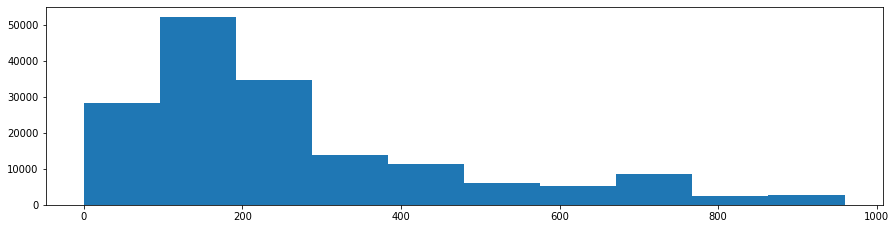

In [112]:
#1등급 고객들의 장바구니 제품 가격(이상치 제거)
q1 = cart_VIP1['price'].quantile(0.25)
q3 = cart_VIP1['price'].quantile(0.75)
iqr = q3-q1

condition = cart_VIP1['price']>q3+1.5*iqr
a = cart_VIP1[condition].index
cart_VIP1.drop(a,inplace=True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.hist(cart_VIP1['price'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(array([63163., 82159., 75194., 60597., 22183., 13928., 16453., 13380.,
         4043., 11513.]),
 array([  0.  ,  75.16, 150.32, 225.48, 300.64, 375.8 , 450.96, 526.12,
        601.28, 676.44, 751.6 ]),
 <a list of 10 Patch objects>)

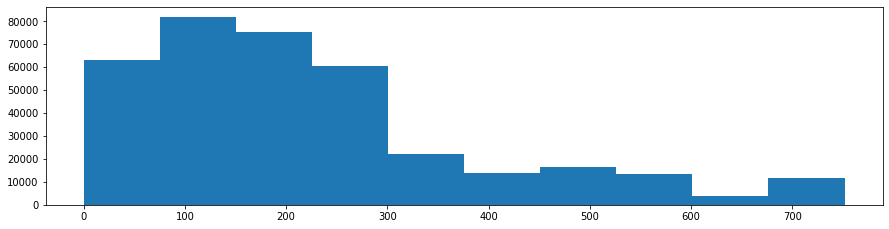

In [113]:
#2등급 고객들의 장바구니 제품 가격(이상치 제거)
q1 = cart_VIP2['price'].quantile(0.25)
q3 = cart_VIP2['price'].quantile(0.75)
iqr = q3-q1

condition = cart_VIP2['price']>q3+1.5*iqr
a = cart_VIP2[condition].index
cart_VIP2.drop(a,inplace=True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.hist(cart_VIP2['price'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(array([11259., 18967., 20044., 15156.,  3812.,  3798.,  4463.,  1604.,
         1123.,  3311.]),
 array([  0.   ,  75.418, 150.836, 226.254, 301.672, 377.09 , 452.508,
        527.926, 603.344, 678.762, 754.18 ]),
 <a list of 10 Patch objects>)

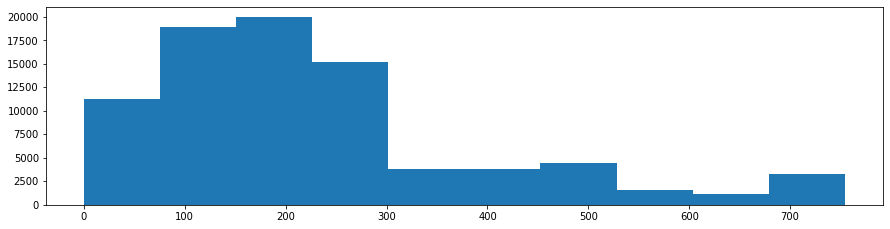

In [114]:
#3등급 고객들의 장바구니 제품 가격(이상치 제거)
q1 = cart_VIP3['price'].quantile(0.25)
q3 = cart_VIP3['price'].quantile(0.75)
iqr = q3-q1

condition = cart_VIP3['price']>q3+1.5*iqr
a = cart_VIP3[condition].index
cart_VIP3.drop(a,inplace=True)

plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.hist(cart_VIP3['price'])

=> 1,2,3등급의 고객들 모두 보거나 구매한 제품들의 금액대 그래프와 비교해봤을때, 높은 금액대의 제품들을 장바구니에 담아놓고 구매를 망설인다고 생각 해볼 수 있다. 고객의 구매 전환까지 이끌어내기 위해 팝업이나 배너를 실시간으로 노출하며 메시지를 전달해 구매욕구를 상승시키는 전략을 세울 수 있다.

##4. Action item

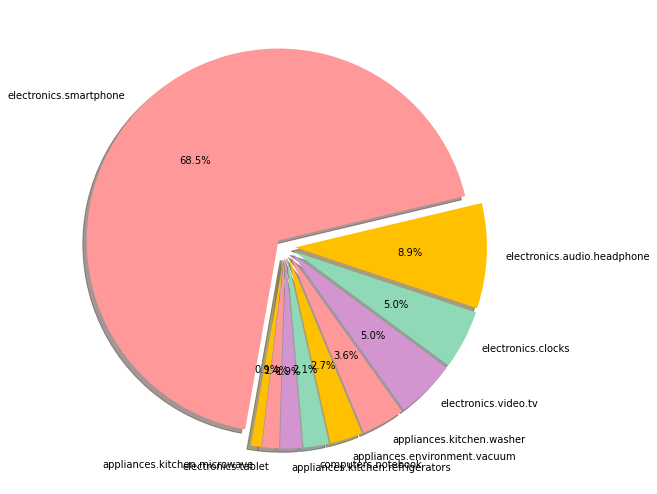

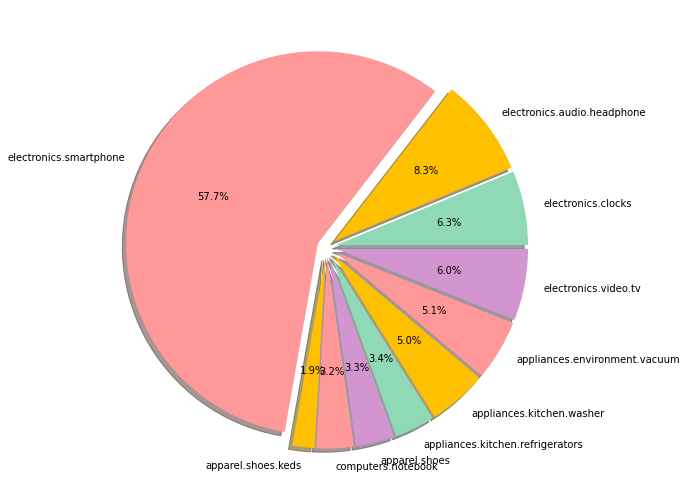

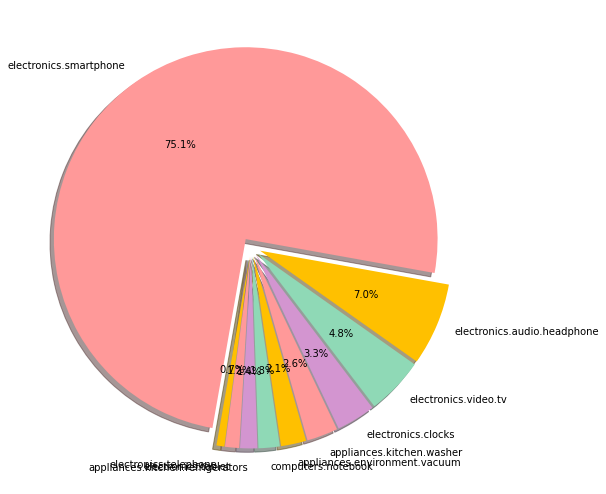

In [107]:
#VIP1가 구매한 상위 10개의 category_code
top_category_code = VIP.loc[:,'category_code'].value_counts()[:10].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(30,30))
plt.subplot(311)
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

#VIP1가 본 상위 10개의 category_code
top_category_code = view_VIP.loc[:,'category_code'].value_counts()[:10].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(30,30))
plt.subplot(312)
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

#VIP1의 장바구니 상위 10개 category_code
top_category_code = cart_VIP1.loc[:,'category_code'].value_counts()[:10].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(30,30))
plt.subplot(313)
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

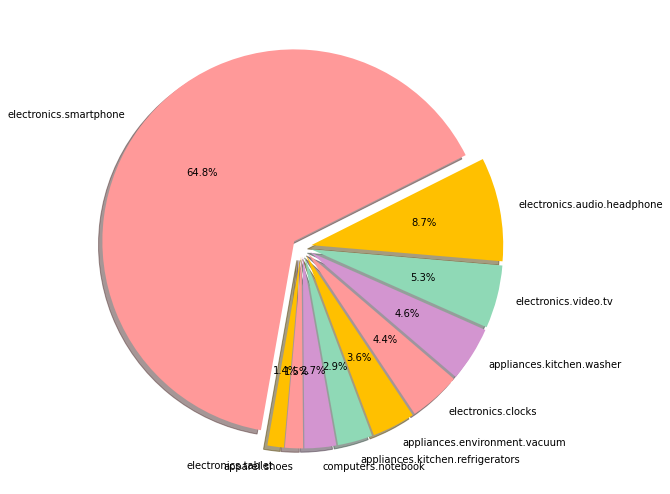

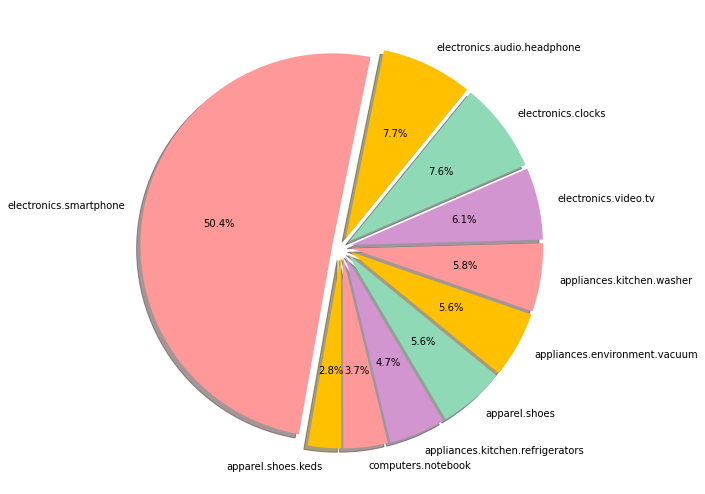

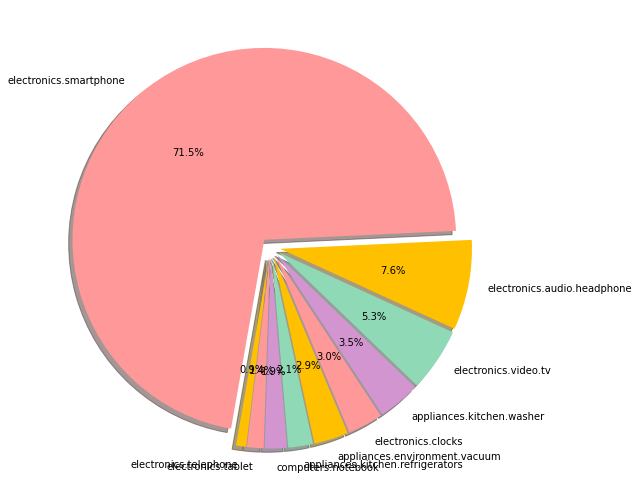

In [106]:
#VIP2 상위 10개의 category_code
top_category_code = VIP_2.loc[:,'category_code'].value_counts()[:10].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(30,30))
plt.subplot(311)
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

#VIP2가 본 상위 10개의 category_code
top_category_code = view_VIP2.loc[:,'category_code'].value_counts()[:10].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(30,30))
plt.subplot(312)
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

#VIP2의 장바구니 상위 10개 category_code
top_category_code = cart_VIP2.loc[:,'category_code'].value_counts()[:10].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(30,30))
plt.subplot(313)
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

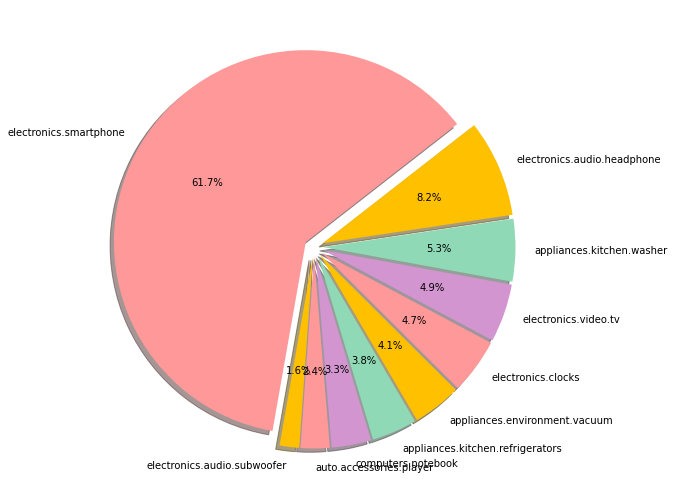

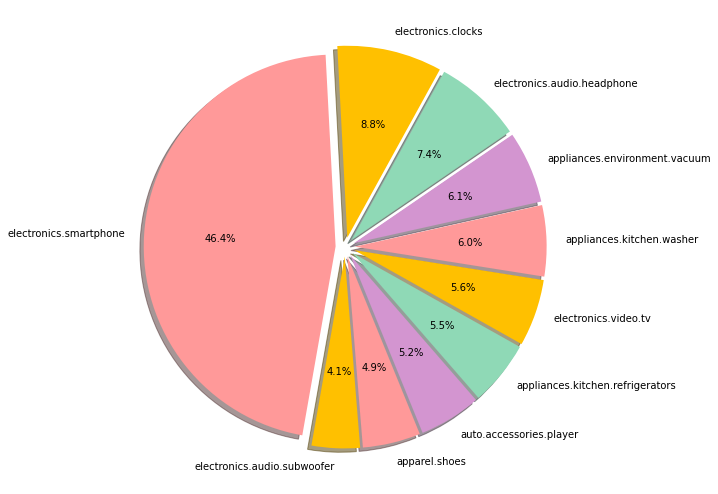

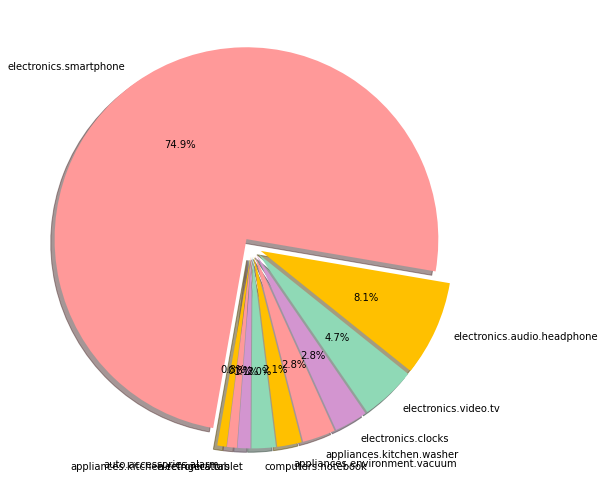

In [105]:
#VIP3가 구매한 상위 10개의 category_code
top_category_code = VIP_3.loc[:,'category_code'].value_counts()[:10].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(30,30))
plt.subplot(311)
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

#VIP3가 본 상위 10개의 category_code
top_category_code = view_VIP3.loc[:,'category_code'].value_counts()[:10].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(30,30))
plt.subplot(312)
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

#VIP3의 장바구니 상위 10개 category_code
top_category_code = cart_VIP3.loc[:,'category_code'].value_counts()[:10].sort_values(ascending=False)
labels = top_category_code.index.array
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.figure(figsize=(30,30))
plt.subplot(313)
plt.pie(top_category_code, labels = labels, autopct='%.1f%%', startangle=260, colors = colors, counterclock=False, explode=explode, shadow=True)
plt.show()

=> 1,2,3 등급 고객들 모두 보거나 장바구니에 담거나 구매한 제품 카테고리는 스마트폰이 압도적인 1위를 차지하고 있다. 이러한 결과를 기반으로 고객들의 관심도가 가장 높은 스마트폰 또는 스마트폰과 관련 된 물품을 보여주는 방식으로 화면 UI를 설정할 수 있을 것이다. 